# MLP
Cell line 09 SK.MEL.5

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during every round of CV.

MCC mean 0.0349

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 16:04:28.047602


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=9]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14]


2023-04-29 16:04:31.021560
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 605
Num RCI: 605
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 605 sequences.

Training # 1 1
2023-04-29 16:04:34.254290
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-3.617194675885877, -0.6775550272484316]
Variances [3.88988878 2.42998052]
Priors [0.37808353 0.62191647]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 337:149 69.34%
Computed class weights: {0: 1.6308724832214765, 1: 0.7210682492581603}
Valid 1:0 82:37 68.91%
FIT


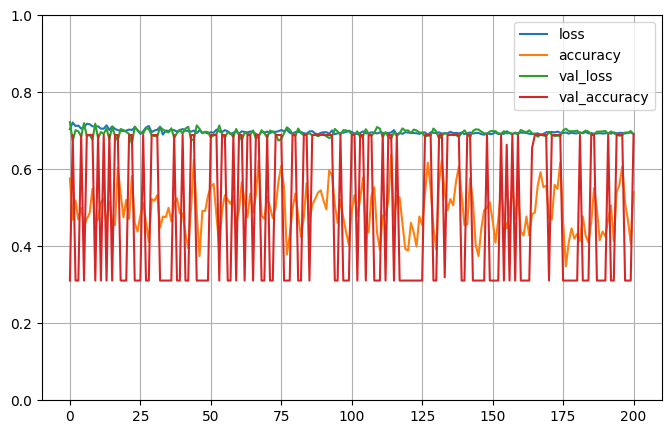


Testing # 1 1
2023-04-29 16:05:17.324586
PREDICT
Test 1:0 82:37 68.91%
Predict 1:0 119:0 100.00%
Test sizes (119, 1025) (119,)
Distrib of scores: 0.50236714 mean 8.767455e-05 std
Range of scores: 0.5021591 to 0.5025792
Score threshold 0.5
Confusion matrix
 [[ 0 37]
 [ 0 82]]
Normalized matrix
 [[0.         0.31092437]
 [0.         0.68907563]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


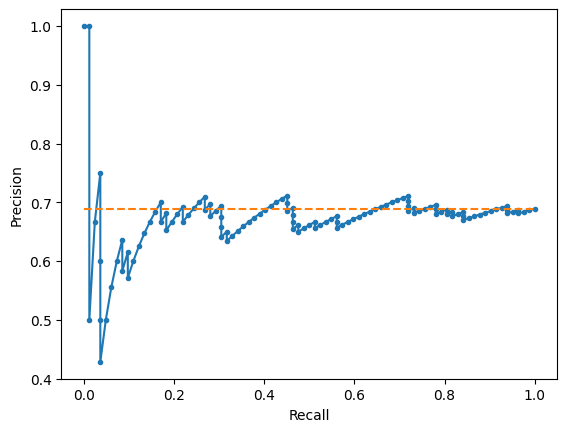

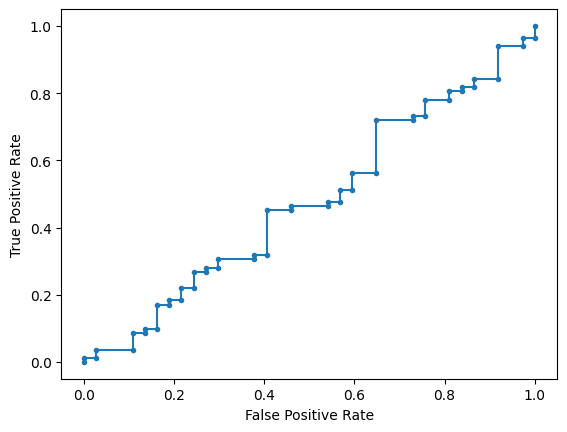

Accuracy: 68.91% Precision: 68.91% Recall: 100.00%
F1: 81.59% MCC: 0.0000
AUPRC: 67.27% AUROC: 47.73%
 accuracy [68.90756302521008]
 precision [68.90756302521008]
 recall [100.0]
 F1 [81.59203980099502]
 MCC [0.0]
 AUPRC [67.27324681467347]
 AUROC [47.72577455504285]

Training # 1 2
2023-04-29 16:05:17.951278
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-0.8392866967815152, -3.7261916667435244]
Variances [2.24439818 3.85617997]
Priors [0.67468501 0.32531499]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 356:118 75.11%
Computed class weights: {0: 2.0084745762711864, 1: 0.6657303370786517}
Valid 1:0 90:41 68.70%
FIT


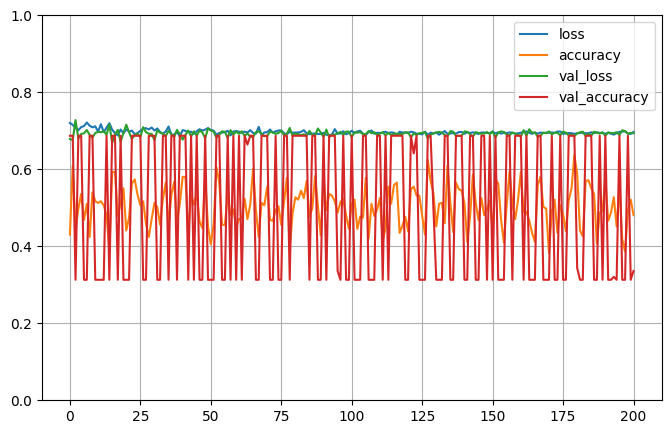


Testing # 1 2
2023-04-29 16:06:00.891814
PREDICT
Test 1:0 90:41 68.70%
Predict 1:0 131:0 100.00%
Test sizes (131, 1025) (131,)
Distrib of scores: 0.51324964 mean 9.74406e-05 std
Range of scores: 0.5130273 to 0.51371795
Score threshold 0.5
Confusion matrix
 [[ 0 41]
 [ 0 90]]
Normalized matrix
 [[0.        0.3129771]
 [0.        0.6870229]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


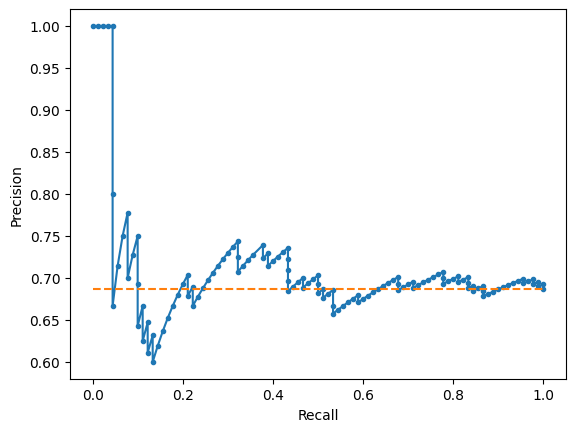

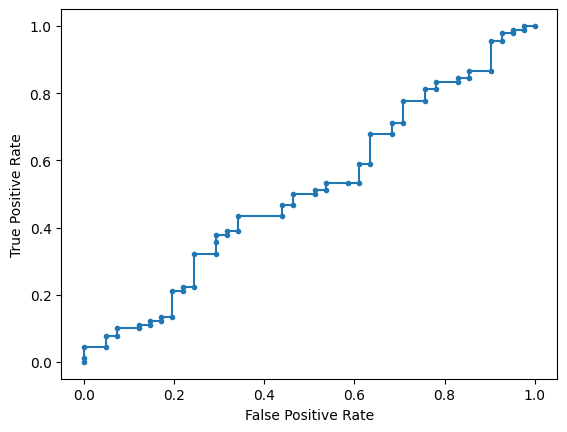

Accuracy: 68.70% Precision: 68.70% Recall: 100.00%
F1: 81.45% MCC: 0.0000
AUPRC: 70.67% AUROC: 51.41%
 accuracy [68.70229007633588]
 precision [68.70229007633588]
 recall [100.0]
 F1 [81.44796380090497]
 MCC [0.0]
 AUPRC [70.67028336680893]
 AUROC [51.40921409214092]

Training # 1 3
2023-04-29 16:06:01.472803
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-0.6711136150182023, -3.501645578514342]
Variances [2.40174825 4.16648965]
Priors [0.61065171 0.38934829]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 332:157 67.89%
Computed class weights: {0: 1.5573248407643312, 1: 0.7364457831325302}
Valid 1:0 80:36 68.97%
FIT


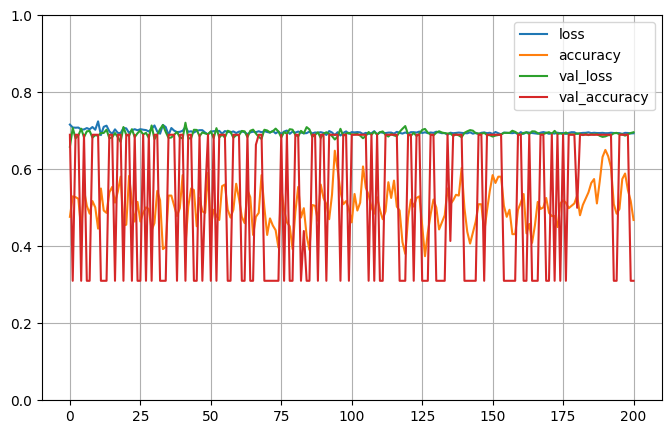


Testing # 1 3
2023-04-29 16:06:48.009933
PREDICT
Test 1:0 80:36 68.97%
Predict 1:0 116:0 100.00%
Test sizes (116, 1025) (116,)
Distrib of scores: 0.5042069 mean 0.00010314773 std
Range of scores: 0.5039683 to 0.5044884
Score threshold 0.5
Confusion matrix
 [[ 0 36]
 [ 0 80]]
Normalized matrix
 [[0.         0.31034483]
 [0.         0.68965517]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


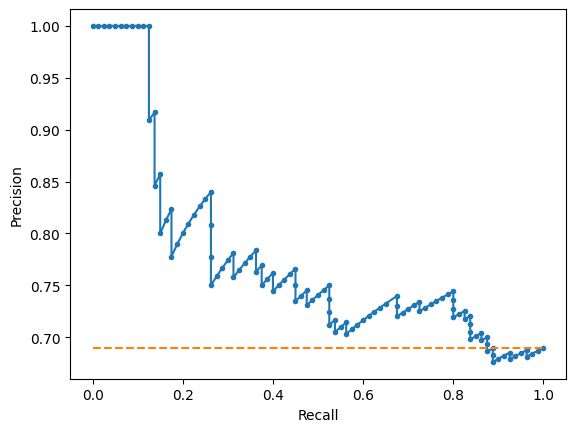

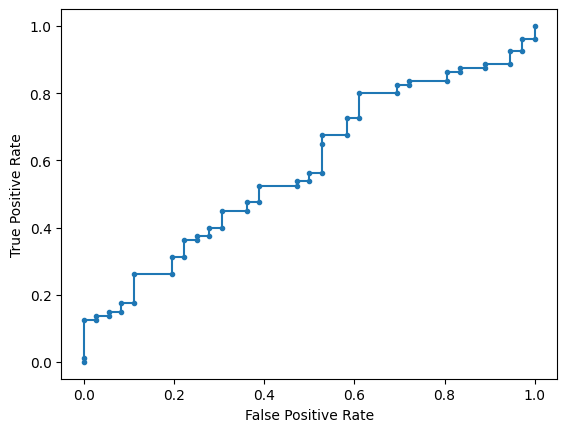

Accuracy: 68.97% Precision: 68.97% Recall: 100.00%
F1: 81.63% MCC: 0.0000
AUPRC: 77.52% AUROC: 58.23%
 accuracy [68.96551724137932]
 precision [68.96551724137932]
 recall [100.0]
 F1 [81.63265306122449]
 MCC [0.0]
 AUPRC [77.5217924589077]
 AUROC [58.22916666666666]

Training # 1 4
2023-04-29 16:06:48.588482
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-3.702055783121497, -0.6873713938618194]
Variances [3.87807096 2.19137027]
Priors [0.3710559 0.6289441]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 337:153 68.78%
Computed class weights: {0: 1.6013071895424837, 1: 0.7270029673590505}
Valid 1:0 83:32 72.17%
FIT


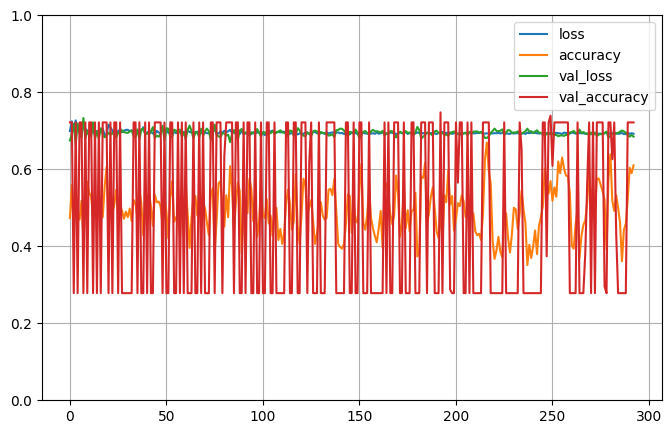


Testing # 1 4
2023-04-29 16:07:31.540190
PREDICT
Test 1:0 83:32 72.17%
Predict 1:0 108:7 93.91%
Test sizes (115, 1025) (115,)
Distrib of scores: 0.5001836 mean 0.00012467934 std
Range of scores: 0.4999098 to 0.5005016
Score threshold 0.5
Confusion matrix
 [[ 5 27]
 [ 2 81]]
Normalized matrix
 [[0.04347826 0.23478261]
 [0.0173913  0.70434783]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


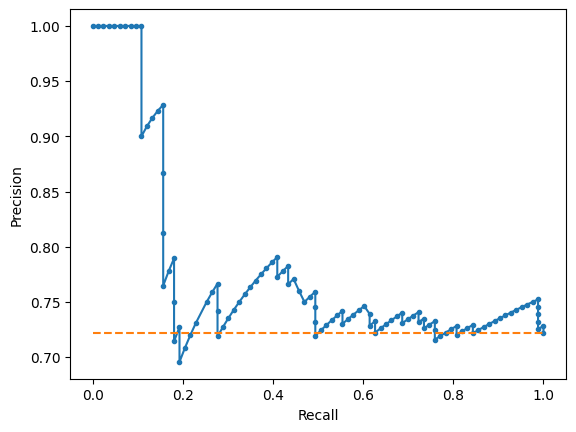

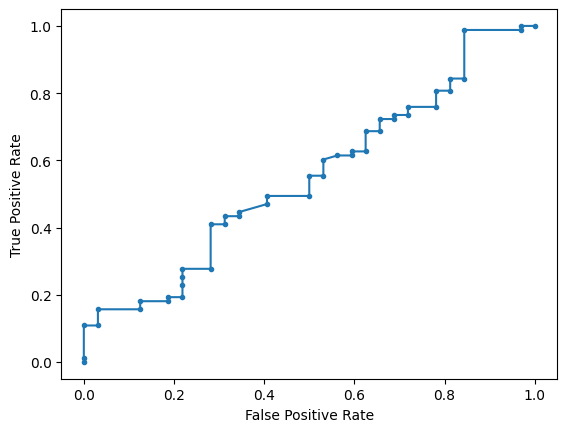

Accuracy: 74.78% Precision: 75.00% Recall: 97.59%
F1: 84.82% MCC: 0.2477
AUPRC: 77.77% AUROC: 54.99%
 accuracy [74.78260869565217]
 precision [75.0]
 recall [97.59036144578313]
 F1 [84.81675392670157]
 MCC [0.24770352295434378]
 AUPRC [77.77221109328863]
 AUROC [54.98870481927711]

Training # 1 5
2023-04-29 16:07:32.130381
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-3.7261785811842945, -0.6690338726000399]
Variances [3.46549139 2.21193957]
Priors [0.37812052 0.62187948]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 326:155 67.78%
Computed class weights: {0: 1.5516129032258064, 1: 0.7377300613496932}
Valid 1:0 86:38 69.35%
FIT


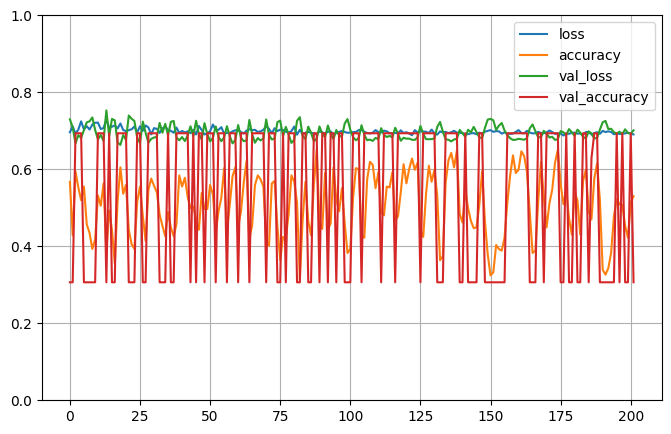


Testing # 1 5
2023-04-29 16:08:15.088452
PREDICT
Test 1:0 86:38 69.35%
Predict 1:0 124:0 100.00%
Test sizes (124, 1025) (124,)
Distrib of scores: 0.5132403 mean 5.884408e-05 std
Range of scores: 0.5130532 to 0.51343614
Score threshold 0.5
Confusion matrix
 [[ 0 38]
 [ 0 86]]
Normalized matrix
 [[0.         0.30645161]
 [0.         0.69354839]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


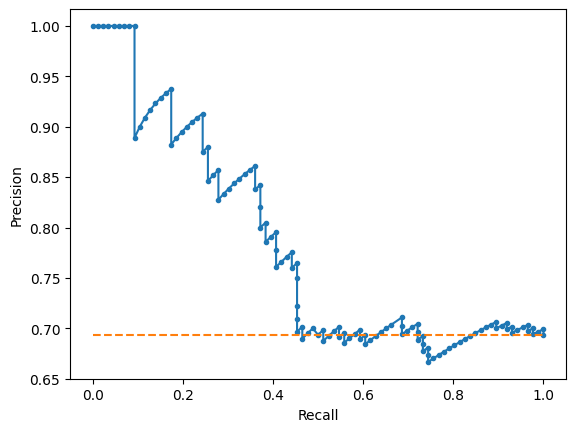

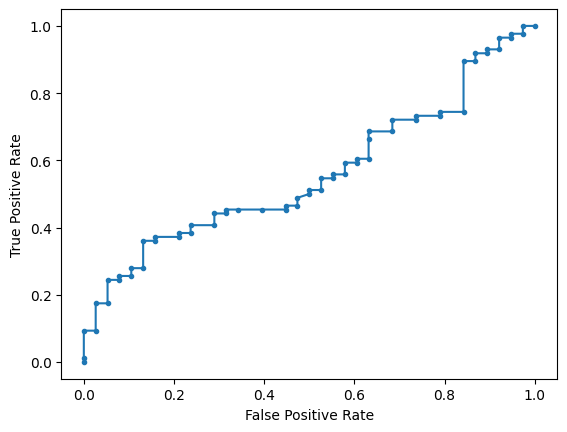

Accuracy: 69.35% Precision: 69.35% Recall: 100.00%
F1: 81.90% MCC: 0.0000
AUPRC: 78.17% AUROC: 56.01%
 accuracy [69.35483870967742]
 precision [69.35483870967742]
 recall [100.0]
 F1 [81.90476190476191]
 MCC [0.0]
 AUPRC [78.16561926912769]
 AUROC [56.012851897184824]

Training # 2 1
2023-04-29 16:08:15.683787
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-0.7044079313764524, -3.447489025926297]
Variances [2.34384687 4.24995923]
Priors [0.63411515 0.36588485]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 349:139 71.52%
Computed class weights: {0: 1.7553956834532374, 1: 0.6991404011461319}
Valid 1:0 76:41 64.96%
FIT


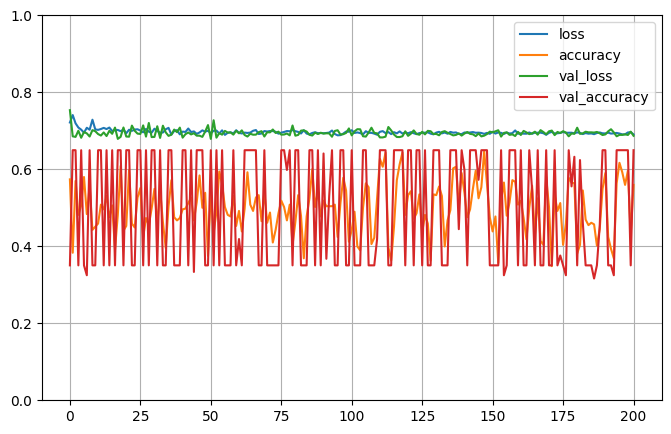


Testing # 2 1
2023-04-29 16:08:58.661560
PREDICT
Test 1:0 76:41 64.96%
Predict 1:0 117:0 100.00%
Test sizes (117, 1025) (117,)
Distrib of scores: 0.5091042 mean 0.0006107337 std
Range of scores: 0.5078631 to 0.51063615
Score threshold 0.5
Confusion matrix
 [[ 0 41]
 [ 0 76]]
Normalized matrix
 [[0.         0.35042735]
 [0.         0.64957265]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


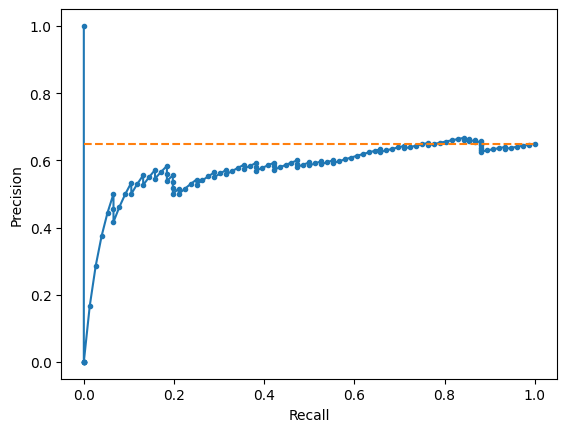

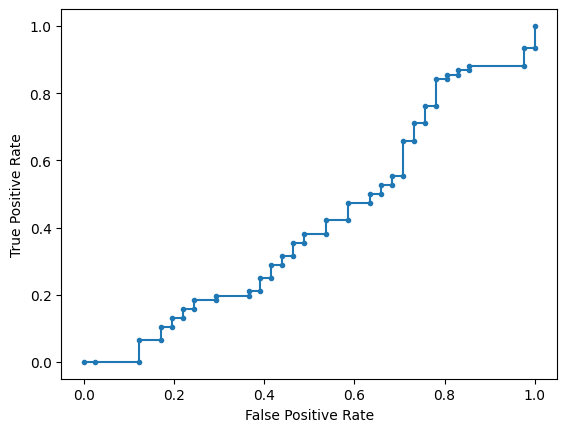

Accuracy: 64.96% Precision: 64.96% Recall: 100.00%
F1: 78.76% MCC: 0.0000
AUPRC: 57.64% AUROC: 41.66%
 accuracy [64.95726495726495]
 precision [64.95726495726495]
 recall [100.0]
 F1 [78.75647668393782]
 MCC [0.0]
 AUPRC [57.64108235010592]
 AUROC [41.655969191270856]

Training # 2 2
2023-04-29 16:08:59.251114
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-0.7113245087252413, -3.726210224667785]
Variances [2.23643016 3.85394785]
Priors [0.61894249 0.38105751]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 335:157 68.09%
Computed class weights: {0: 1.5668789808917198, 1: 0.7343283582089553}
Valid 1:0 85:28 75.22%
FIT


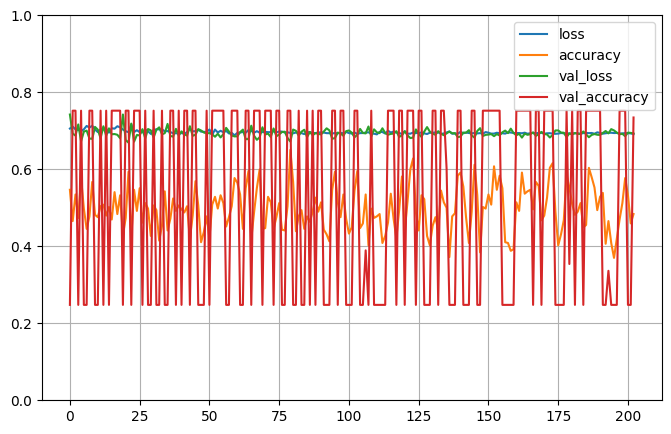


Testing # 2 2
2023-04-29 16:09:27.453093
PREDICT
Test 1:0 85:28 75.22%
Predict 1:0 113:0 100.00%
Test sizes (113, 1025) (113,)
Distrib of scores: 0.5101283 mean 4.717538e-05 std
Range of scores: 0.50999546 to 0.51025736
Score threshold 0.5
Confusion matrix
 [[ 0 28]
 [ 0 85]]
Normalized matrix
 [[0.         0.24778761]
 [0.         0.75221239]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


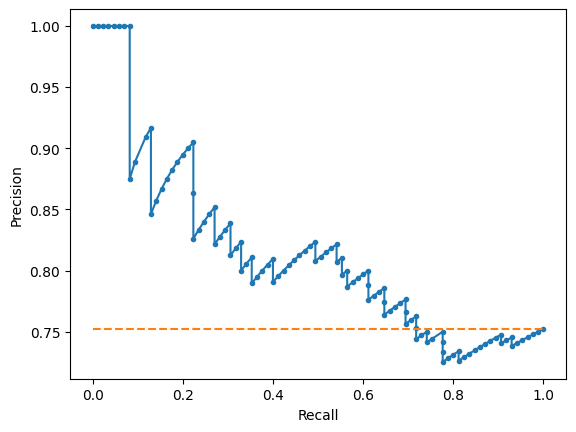

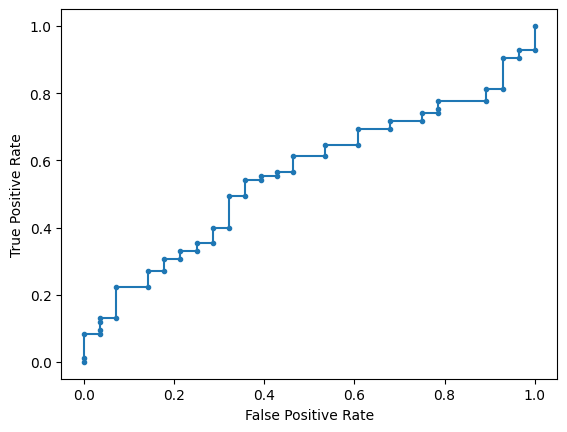

Accuracy: 75.22% Precision: 75.22% Recall: 100.00%
F1: 85.86% MCC: 0.0000
AUPRC: 81.36% AUROC: 55.46%
 accuracy [75.22123893805309]
 precision [75.22123893805309]
 recall [100.0]
 F1 [85.85858585858584]
 MCC [0.0]
 AUPRC [81.35501258362264]
 AUROC [55.46218487394958]

Training # 2 3
2023-04-29 16:09:28.311605
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-3.6397096141215544, -0.6078324323072102]
Variances [3.61858157 2.27092026]
Priors [0.37375479 0.62624521]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 323:151 68.14%
Computed class weights: {0: 1.5695364238410596, 1: 0.7337461300309598}
Valid 1:0 85:46 64.89%
FIT


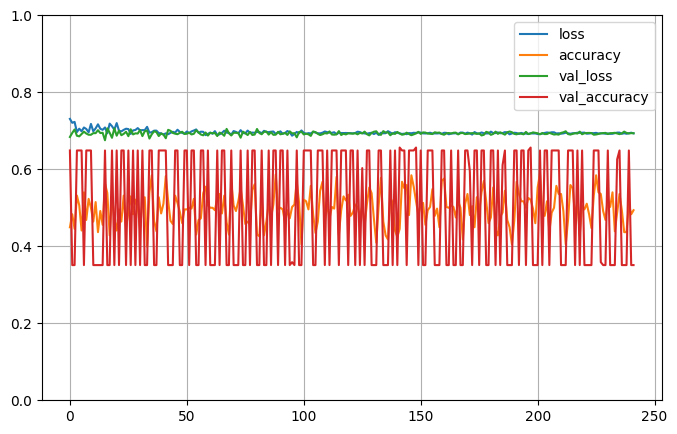


Testing # 2 3
2023-04-29 16:10:13.495178
PREDICT
Test 1:0 85:46 64.89%
Predict 1:0 128:3 97.71%
Test sizes (131, 1025) (131,)
Distrib of scores: 0.5002008 mean 7.9190046e-05 std
Range of scores: 0.49995756 to 0.5004699
Score threshold 0.5
Confusion matrix
 [[ 2 44]
 [ 1 84]]
Normalized matrix
 [[0.01526718 0.33587786]
 [0.00763359 0.64122137]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


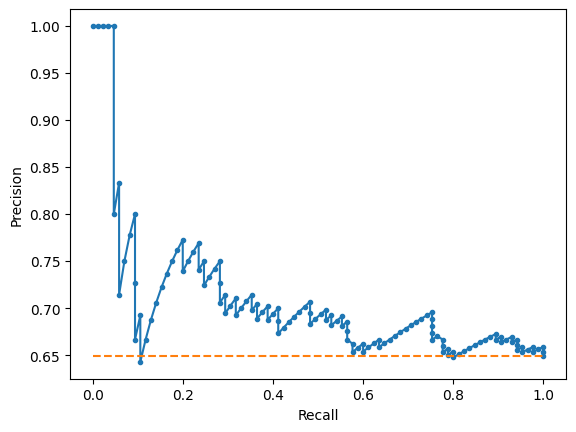

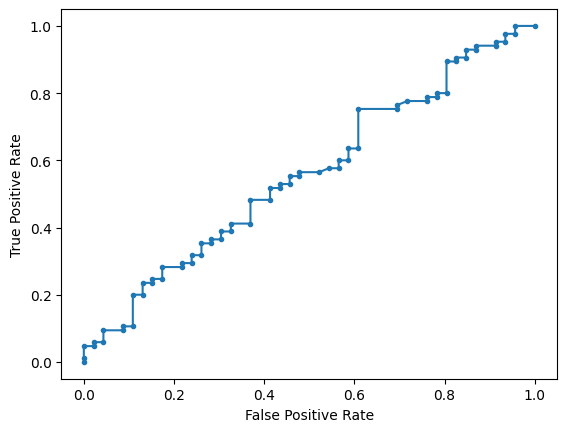

Accuracy: 65.65% Precision: 65.62% Recall: 98.82%
F1: 78.87% MCC: 0.1012
AUPRC: 70.62% AUROC: 55.93%
 accuracy [65.64885496183206]
 precision [65.625]
 recall [98.82352941176471]
 F1 [78.87323943661973]
 MCC [0.10119701312104341]
 AUPRC [70.61772282120661]
 AUROC [55.93350383631714]

Training # 2 4
2023-04-29 16:10:14.125448
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-3.539167165077116, -0.7183175717483565]
Variances [3.98228301 2.46035536]
Priors [0.38333373 0.61666627]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 335:150 69.07%
Computed class weights: {0: 1.6166666666666667, 1: 0.7238805970149254}
Valid 1:0 84:36 70.00%
FIT


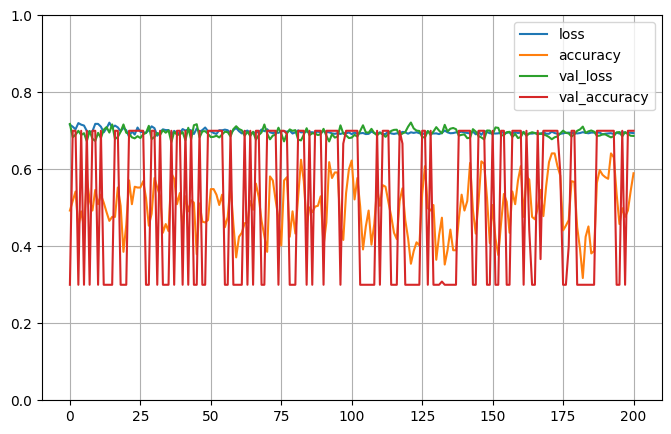


Testing # 2 4
2023-04-29 16:10:57.187602
PREDICT
Test 1:0 84:36 70.00%
Predict 1:0 120:0 100.00%
Test sizes (120, 1025) (120,)
Distrib of scores: 0.5140317 mean 9.773974e-05 std
Range of scores: 0.51379734 to 0.514305
Score threshold 0.5
Confusion matrix
 [[ 0 36]
 [ 0 84]]
Normalized matrix
 [[0.  0.3]
 [0.  0.7]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


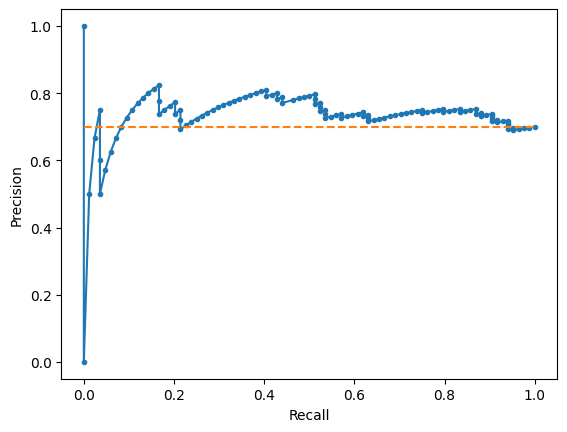

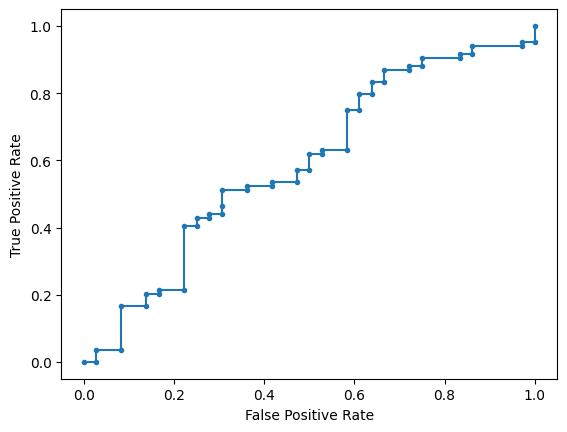

Accuracy: 70.00% Precision: 70.00% Recall: 100.00%
F1: 82.35% MCC: 0.0000
AUPRC: 73.46% AUROC: 59.03%
 accuracy [70.0]
 precision [70.0]
 recall [100.0]
 F1 [82.35294117647058]
 MCC [0.0]
 AUPRC [73.45904993871834]
 AUROC [59.02777777777778]

Training # 2 5
2023-04-29 16:10:57.728202
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-0.7994429784507591, -3.791232079503779]
Variances [2.18738329 3.72447221]
Priors [0.64494959 0.35505041]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
Train 1:0 343:138 71.31%
Computed class weights: {0: 1.7427536231884058, 1: 0.7011661807580175}
Valid 1:0 93:31 75.00%
FIT


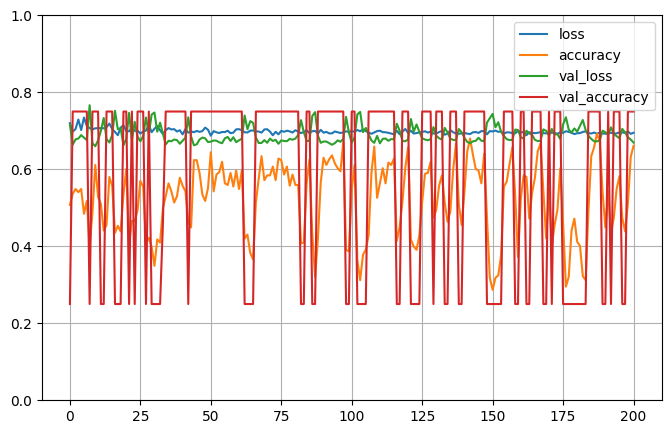


Testing # 2 5
2023-04-29 16:11:40.671477
PREDICT
Test 1:0 93:31 75.00%
Predict 1:0 124:0 100.00%
Test sizes (124, 1025) (124,)
Distrib of scores: 0.5251849 mean 0.00010088963 std
Range of scores: 0.52492416 to 0.5254731
Score threshold 0.5
Confusion matrix
 [[ 0 31]
 [ 0 93]]
Normalized matrix
 [[0.   0.25]
 [0.   0.75]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


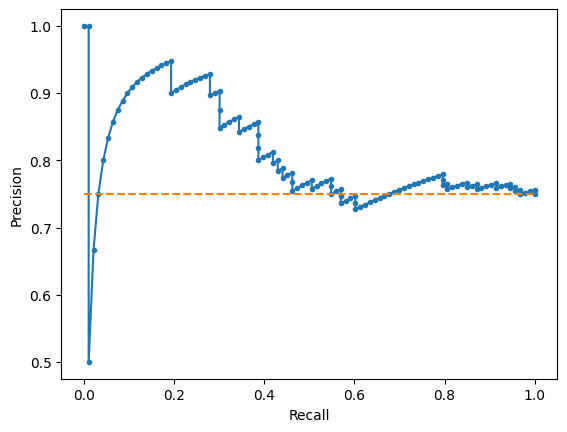

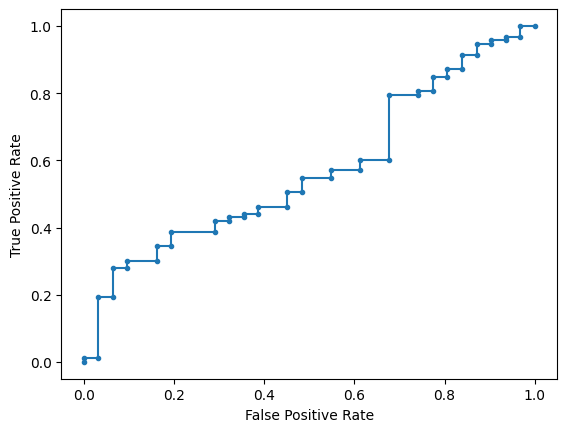

Accuracy: 75.00% Precision: 75.00% Recall: 100.00%
F1: 85.71% MCC: 0.0000
AUPRC: 80.77% AUROC: 56.95%
 accuracy [75.0]
 precision [75.0]
 recall [100.0]
 F1 [85.71428571428571]
 MCC [0.0]
 AUPRC [80.77153910288389]
 AUROC [56.954561220950396]
2023-04-29 16:11:41.263267


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 70.15% std 3.71
 precision mean 70.17% std 3.74
 recall mean 99.64% std 0.81
 F1 mean 82.29% std 2.51
 MCC mean 0.0349 std 0.0813
 AUPRC mean 73.52% std 7.28
 AUROC mean 53.74% std 5.38
 accuracy [[68.90756302521008], [68.70229007633588], [68.96551724137932], [74.78260869565217], [69.35483870967742], [64.95726495726495], [75.22123893805309], [65.64885496183206], [70.0], [75.0]]
 precision [[68.90756302521008], [68.70229007633588], [68.96551724137932], [75.0], [69.35483870967742], [64.95726495726495], [75.22123893805309], [65.625], [70.0], [75.0]]
 recall [[100.0], [100.0], [100.0], [97.59036144578313], [100.0], [100.0], [100.0], [98.82352941176471], [100.0], [100.0]]
 F1 [[81.59203980099502], [81.44796380090497], [81.63265306122449], [84.81675392670157], [81.90476190476191], [78.75647668393782], [85.85858585858584], [78.87323943661973], [82.35294117647058], [85.71428571428571]]
 MCC [[0.0], [0.0], [0.0], [0.24770352295434378], [0.0], [0.0], [0.0], [0.10119701312104341], 